# HomeWork 8
**DeadLine : 23:59 29 Aban 1400**

**Total points : 100pts**

# 1. Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [3]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

Cloning into 'google-images-download'...
remote: Enumerating objects: 719, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 719 (delta 32), reused 48 (delta 32), pack-reused 666
Receiving objects: 100% (719/719), 319.77 KiB | 10.31 MiB/s, done.
Resolving deltas: 100% (422/422), done.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating google_images_download.egg-info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_image

costom dataset config:

In [4]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [5]:
!googleimagesdownload -cf dataset.json


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2019-honda-civic-sedan-1558453497.jpg?crop=1xw:0.9997727789138833xh;center,top&resize=480:*
Completed Image ====> 1.2019-honda-civic-sedan-1558453497.jpg
Image URL: https://cars.usnews.com/static/images/Auto/custom/14737/2022_Acura_ILX_1.jpg
IOError on an image...trying next one... Error: The read operation timed out
Image URL: https://auto1-homepage.prod.mp.auto1.cloud/static/optimized/orange-car-hp-right-mercedez.png
Completed Image ====> 2.orange-car-hp-right-mercedez.png
Image URL: https://1auto.co/storage/ready_for_sales/20210709155718_2022-chevrolet-corvette-z06-1607016574.jpg
Completed Image ====> 3.20210709155718_2022-chevrolet-corvette-z06-1607016574.jpg
Image URL: https://api.ferrarinetwork.ferrari.com/v2/network-content/medias//resize/5f993356fe3b8d087f91e1c5-ferrari-roma-car-design-award_2020?apikey=9QscUiwr5n0NhOuQb463QEKghPrVlpaF&widt

## 2.2 Splite data To train set && test set

In [6]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

In [7]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


60
60
60
60
60


In [8]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


## 2.2. Copy Training data to Google Drive

In [9]:
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
shutil.move('./train/', destination)
shutil.move('./test/', destination)


'/content/drive/MyDrive/HW7_Dataset/test'

In [10]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 3. Load Dataset From Google Drive

In [11]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test/'+ ' ./')


0

In [12]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 4. Generator

In [20]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 16
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("train", target_size=(150, 150), batch_size=batch_size)
validation_generator = test_datagen.flow_from_directory("test", target_size=(150, 150), batch_size=batch_size)


Found 219 images belonging to 5 classes.
Found 59 images belonging to 5 classes.


In [21]:
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

(16, 150, 150, 3)
(16, 5)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


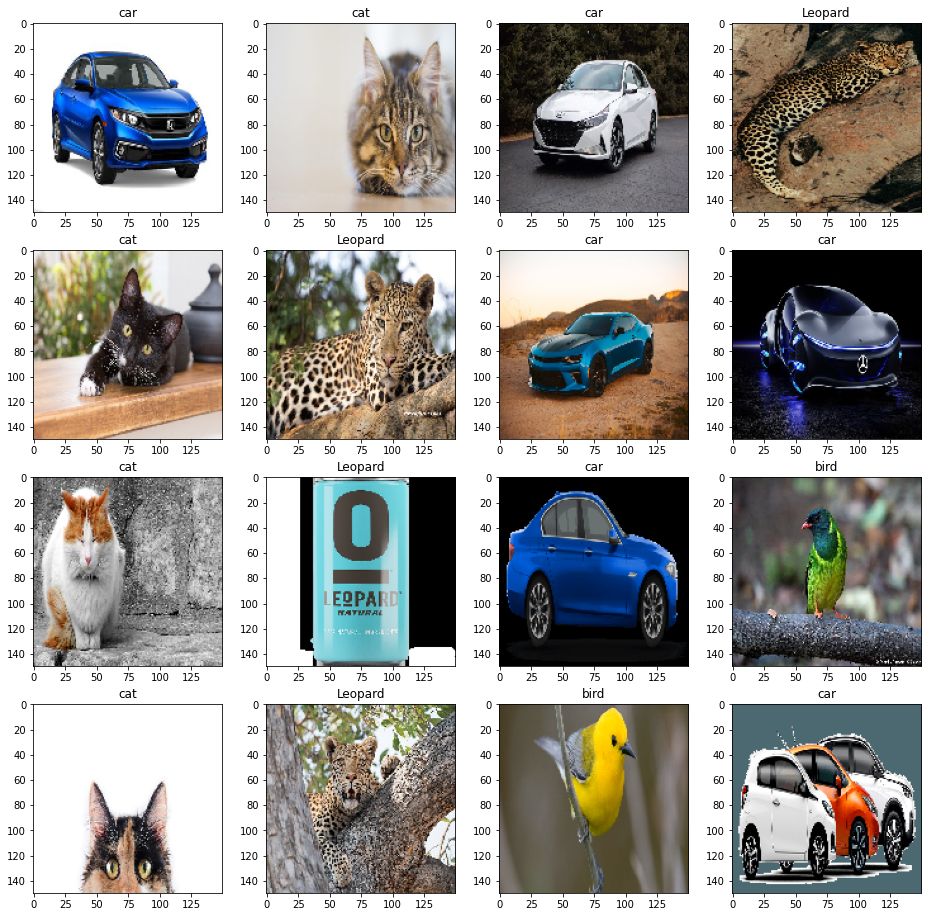

In [22]:
from matplotlib import pyplot as plt
import numpy as np
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(3)

def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img)
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)


# Part A: build and train model without using data augmentation

In [42]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy

def build_model():
  kernel_size = 5
  model = Sequential()
  model.add(Conv2D(8, kernel_size, activation ="relu", input_shape=(150, 150, 3)))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(16, kernel_size, activation ="relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(32, kernel_size, activation ="relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(64, kernel_size, activation ="relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(64, activation = "relu"))
  model.add(Dense(5, activation = "softmax"))
  return model

In [44]:
model = build_model()
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
model.fit(train_generator, epochs=50, batch_size=16, validation_data=validation_generator)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 12s 223ms/step - loss: 1.6278 - accuracy: 0.1963 - val_loss: 1.6083 - val_accuracy: 0.2542
Epoch 2/50
14/14 [==============================] - 3s 201ms/step - loss: 1.6075 - accuracy: 0.2055 - val_loss: 1.6045 - val_accuracy: 0.2373
Epoch 3/50
14/14 [==============================] - 3s 190ms/step - loss: 1.6029 - accuracy: 0.2100 - val_loss: 1.5944 - val_accuracy: 0.2203
Epoch 4/50
14/14 [==============================] - 3s 195ms/step - loss: 1.5872 - accuracy: 0.2192 - val_loss: 1.5458 - val_accuracy: 0.2203
Epoch 5/50
14/14 [==============================] - 3s 194ms/step - loss: 1.5879 - accuracy: 0.2283 - val_loss: 1.6078 - val_accuracy: 0.1864
Epoch 6/50
14/14 [==============================] - 3s 194ms/step - loss: 1.5947 - accuracy: 0.2374 - val_loss: 1.5566 - val_accuracy: 0.3898
Epoch 7/50
14/14 [==============================] - 3s 192ms/step - loss: 1.4734 - accuracy: 0.3790 - val_loss: 1.2856 - val_accuracy: 0.4237
Epoch 8/50
14/14

In [47]:
model.evaluate(validation_generator, batch_size=16)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 129ms/step - loss: 5.2953 - accuracy: 0.4068


[5.295302867889404, 0.4067796468734741]

# Part B: train model using data augmentation

In [52]:
train_datagen_aug1 = ImageDataGenerator(rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2)
train_generator1 = train_datagen_aug1.flow_from_directory("train", target_size=(150, 150), batch_size=batch_size)

model = build_model()
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
model.fit(train_generator1, epochs=50, batch_size=16, validation_data=validation_generator)

Found 219 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
14/14 [==============================] - 5s 292ms/step - loss: 1.7167 - accuracy: 0.1963 - val_loss: 1.5655 - val_accuracy: 0.2542
Epoch 2/50
14/14 [==============================] - 4s 263ms/step - loss: 1.5687 - accuracy: 0.2694 - val_loss: 1.5238 - val_accuracy: 0.2712
Epoch 3/50
14/14 [==============================] - 4s 265ms/step - loss: 1.5481 - accuracy: 0.2511 - val_loss: 1.6510 - val_accuracy: 0.2542
Epoch 4/50
14/14 [==============================] - 4s 263ms/step - loss: 1.5149 - accuracy: 0.2785 - val_loss: 1.5558 - val_accuracy: 0.2712
Epoch 5/50
14/14 [==============================] - 4s 255ms/step - loss: 1.5335 - accuracy: 0.2740 - val_loss: 1.7872 - val_accuracy: 0.3390
Epoch 6/50
14/14 [==============================] - 4s 258ms/step - loss: 1.4851 - accuracy: 0.3425 - val_loss: 1.4114 - val_accuracy: 0.3220
Epoch 7/50
14/14 [==============================] - 4s 263ms/step - loss: 1.4790 - accuracy: 0.3516 - val_loss: 1.4171 - val_accuracy: 0.3559
Epoch 

In [51]:
model.evaluate(validation_generator, batch_size=16)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 122ms/step - loss: 1.3421 - accuracy: 0.5085


[1.3421475887298584, 0.508474588394165]

In [53]:
train_datagen_aug2 = ImageDataGenerator(rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
train_generator2 = train_datagen_aug1.flow_from_directory("train", target_size=(150, 150), batch_size=batch_size)

model = build_model()
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
model.fit(train_generator2, epochs=50, batch_size=16, validation_data=validation_generator)

Found 219 images belonging to 5 classes.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
14/14 [==============================] - 5s 293ms/step - loss: 1.6323 - accuracy: 0.1918 - val_loss: 1.5968 - val_accuracy: 0.2203
Epoch 2/50
14/14 [==============================] - 4s 275ms/step - loss: 1.5861 - accuracy: 0.2237 - val_loss: 1.5794 - val_accuracy: 0.2373
Epoch 3/50
14/14 [==============================] - 4s 269ms/step - loss: 1.5758 - accuracy: 0.2922 - val_loss: 1.5775 - val_accuracy: 0.2542
Epoch 4/50
14/14 [==============================] - 4s 272ms/step - loss: 1.5677 - accuracy: 0.2557 - val_loss: 1.5205 - val_accuracy: 0.2542
Epoch 5/50
14/14 [==============================] - 4s 268ms/step - loss: 1.5394 - accuracy: 0.2694 - val_loss: 1.4501 - val_accuracy: 0.4068
Epoch 6/50
14/14 [==============================] - 4s 270ms/step - loss: 1.5110 - accuracy: 0.2557 - val_loss: 1.4275 - val_accuracy: 0.3559
Epoch 7/50
14/14 [==============================] - 4s 272ms/step - loss: 1.4461 - accuracy: 0.3196 - val_loss: 2.6429 - val_accuracy: 0.2542
Epoch 

In [54]:
model.evaluate(validation_generator, batch_size=16)

3/4 [=====================>........] - ETA: 0s - loss: 1.0021 - accuracy: 0.5833

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 126ms/step - loss: 0.9469 - accuracy: 0.6102


[0.9469214081764221, 0.6101694703102112]

# Part C: build and train model with dropout

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy

def build_model(d_rate):
  kernel_size = 5
  model = Sequential()
  model.add(Conv2D(8, kernel_size, activation ="relu", input_shape=(150, 150, 3)))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(d_rate))
  model.add(Conv2D(16, kernel_size, activation ="relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(d_rate))
  model.add(Conv2D(32, kernel_size, activation ="relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(d_rate))
  model.add(Conv2D(64, kernel_size, activation ="relu"))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(d_rate))
  model.add(Flatten())
  model.add(Dense(64, activation = "relu"))
  model.add(Dense(5, activation = "softmax"))
  return model

In [58]:
model = build_model(0.5)
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
model.fit(train_generator2, epochs=50, batch_size=16, validation_data=validation_generator)

Epoch 1/50
 1/14 [=>............................] - ETA: 13s - loss: 1.9671 - accuracy: 0.3750

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 5s 290ms/step - loss: 1.7717 - accuracy: 0.1781 - val_loss: 1.6109 - val_accuracy: 0.2373
Epoch 2/50
14/14 [==============================] - 4s 264ms/step - loss: 1.6144 - accuracy: 0.1918 - val_loss: 1.6090 - val_accuracy: 0.1864
Epoch 3/50
14/14 [==============================] - 4s 266ms/step - loss: 1.6201 - accuracy: 0.2146 - val_loss: 1.6083 - val_accuracy: 0.2203
Epoch 4/50
14/14 [==============================] - 4s 269ms/step - loss: 1.6080 - accuracy: 0.2100 - val_loss: 1.6087 - val_accuracy: 0.2373
Epoch 5/50
14/14 [==============================] - 4s 274ms/step - loss: 1.6044 - accuracy: 0.2283 - val_loss: 1.6071 - val_accuracy: 0.2203
Epoch 6/50
14/14 [==============================] - 4s 268ms/step - loss: 1.6041 - accuracy: 0.2557 - val_loss: 1.6038 - val_accuracy: 0.2203
Epoch 7/50
14/14 [==============================] - 4s 269ms/step - loss: 1.5923 - accuracy: 0.2146 - val_loss: 1.5861 - val_accuracy: 0.2203
Epoch 8/50
14/14 

In [59]:
model.evaluate(validation_generator, batch_size=16)

2/4 [==============>...............] - ETA: 0s - loss: 1.0675 - accuracy: 0.5312

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 132ms/step - loss: 1.1426 - accuracy: 0.5593


[1.142621397972107, 0.5593220591545105]

In [60]:
model = build_model(0.8)
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
model.fit(train_generator2, epochs=50, batch_size=16, validation_data=validation_generator)

Epoch 1/50
 1/14 [=>............................] - ETA: 13s - loss: 8.6022 - accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 5s 312ms/step - loss: 3.3238 - accuracy: 0.2009 - val_loss: 1.6098 - val_accuracy: 0.2034
Epoch 2/50
14/14 [==============================] - 4s 271ms/step - loss: 1.6262 - accuracy: 0.2511 - val_loss: 1.6093 - val_accuracy: 0.2203
Epoch 3/50
14/14 [==============================] - 4s 266ms/step - loss: 1.6054 - accuracy: 0.2100 - val_loss: 1.6091 - val_accuracy: 0.2203
Epoch 4/50
14/14 [==============================] - 4s 270ms/step - loss: 1.5976 - accuracy: 0.2466 - val_loss: 1.6088 - val_accuracy: 0.2203
Epoch 5/50
14/14 [==============================] - 4s 266ms/step - loss: 1.5965 - accuracy: 0.2146 - val_loss: 1.6084 - val_accuracy: 0.2203
Epoch 6/50
14/14 [==============================] - 4s 270ms/step - loss: 1.5831 - accuracy: 0.2100 - val_loss: 1.6081 - val_accuracy: 0.2203
Epoch 7/50
14/14 [==============================] - 4s 264ms/step - loss: 1.5640 - accuracy: 0.2420 - val_loss: 1.6075 - val_accuracy: 0.3559
Epoch 8/50
14/14 

In [61]:
model.evaluate(validation_generator, batch_size=16)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 123ms/step - loss: 1.8509 - accuracy: 0.1864


[1.8509464263916016, 0.18644067645072937]